# __Preprocesamiento - Transformaciones__

Este Notebook contiene algunos de los principios básicos sobre el proceso de  preprocesamiento. Se mencionan algunas de las transformaciones que deberían realizarse sobre un conjunto de datos antes de evaluar cualquier modelo. Es importante aclarar que este Notebook no presenta una revisión exhaustiva sobre los temas mencionados. Su objetivo es presentar los conceptos necesarios para realizar un preprocesamiento inicial. Se contemplarán los siguientes aspectos.

*   Transformar datos numéricos
*   transformar datos categóricos
*   Selección de características
*   Pipelines para preprocesamiento

Se debe realizar una buena documentación sobre el proceso de limpieza de datos. Si se encuentra que ocurrió algún error en una etapa posterior, esto facilitará encontrar la solución.

# __Transformar datos numéricos__

Cuando tenemos características de tipo numérico podemos realizar dos procesos. Primero, verificar la existencia de valores atípicos. Segundo, escalar nuestros datos. Muchos algoritmos de aprendizaje funcionan mejor cuando los datos se encuentran en una misma escala. A continuación, se presetan ejemplos para ambos procesos.

## __Identificar Valores atípicos__

Los valores atípicos (*outliers*) son observaciones que difieren significativamente del resto de los datos. Podemos interpretar esto con un valor anormal y que es muy diferente a los demás datos de la muestra.

<center>

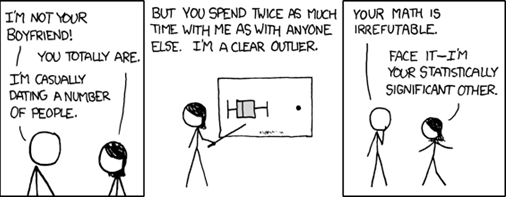
</center>

Estos valores pueden aparecer principalmente por tres causas:

* Errores en el proceso de adquisición
* Perdida de la integridad (corrupción de los datos)
* Observación real de un valor atípico

Es importante mencionar que no existe un método único para identificar valores atípicos. Lo recomendable es consultar con un experto en el dominio del problema para obtener una interpretación de los datos que puedan parecer extraños. Los valores atípicos pueden afectar el desempeño de los modelos de aprendizaje. Por tal motivo, estos valores deben ser sujetos de análisis durante la etapa de exploración inicial.
<center>

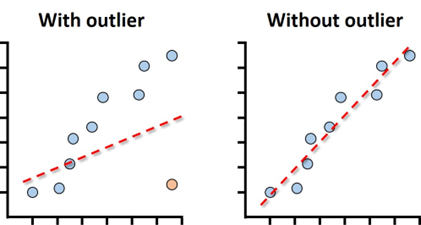

</center>

### __Utilizando la desviación estándar__

Si conocemos de antemano que nuestros datos provienen de una distribución normal (o aproximadamente normal) podemos utilizar la regla empírica para eliminar valores poco probables utilizando la desviación estándar.
<center>

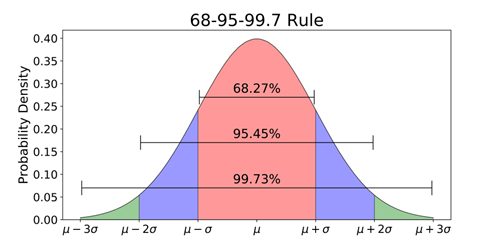

</center>

Veamos un ejemplo:

In [ ]:
import matplotlib.pyplot as plt
from numpy.random import randn
from numpy import mean
from numpy import std
import seaborn as sns

data = 5 * randn(10000) + 50
data_mean, data_std = mean(data), std(data)

cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 27


Podemos verificar el conjunto de datos que serían considerados como valores atípicos si seleccionamos como criterio estar a tres desviaciones estándar de la media.

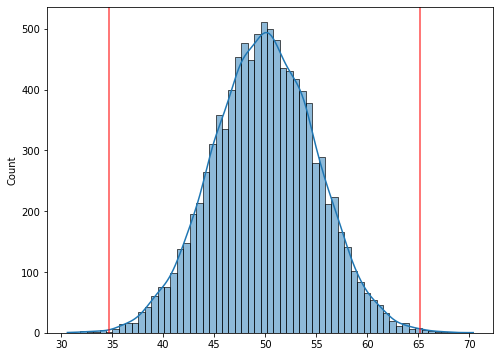

In [ ]:
plt.figure(figsize=(8, 6))
plot = sns.histplot(data, kde=True, legend=False)
plot.axvline(lower, color='red', alpha=0.7)
plot.axvline(upper, color='red',  alpha=0.7)
plt.show()

### __Utilizando el rango intercuartil (IQR)__
No todos nuestros datos se comportarán como una distribución normal y en este caso el método de la varianza puede no ser el adecuado. Un buen estadístico para representar la dispersión de una distribución es el rango intercuartílico (IQR) el cual se calcula como la diferencia entre los cuartiles __Q1__ y __Q3__. Usualmente, consideraremos a un valor atípico si se encuentra a una distancia mayor de __1.5IQR__ de Q3 o __-1.5IQR__ de Q1.

<center>

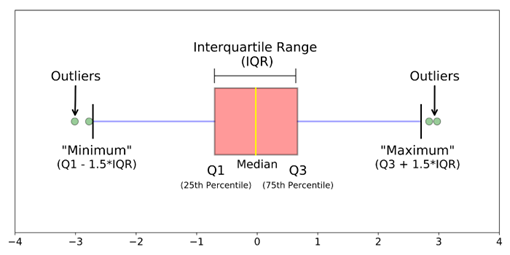

</center>

Veamos un ejemplo:

Percentiles: 25th=46.76, 75th=53.32, IQR=6.56
Identified outliers: 95
Non-outlier observations: 9905


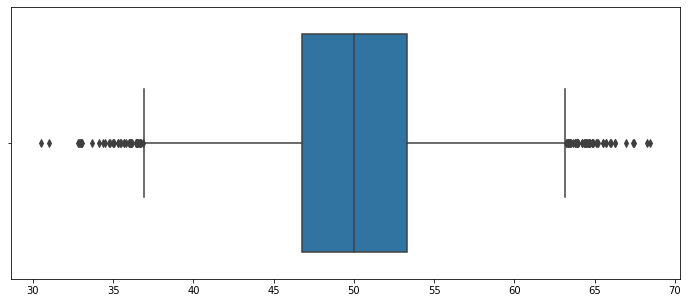

In [ ]:
from numpy.random import randn
from numpy import percentile
import seaborn as sns

data = 5 * randn(10000) + 50

q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th={:.2f}, 75th={:.2f}, IQR={:.2f}'.format(q25, q75, iqr))

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: {}'.format(len(outliers_removed)))
plt.figure(figsize=(12, 5))
sns.boxplot(x=data)
plt.show()

Luego de realizar la eliminación de valores atípicos, la distribución se vería de la siguiente forma.

Identified outliers: 63
Non-outlier observations: 9937


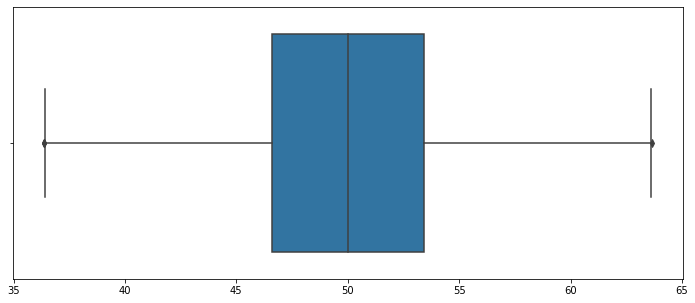

In [ ]:
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

plt.figure(figsize=(12, 5))
sns.boxplot(x=outliers_removed)
plt.show()

## __Escalado de datos__
El escalado puede entenderse como un conjunto de métodos que nos permite cambiar la escala en la que es encuentra nuestros datos. Esto puede mejorar la efectividad de algunos métodos como KNN o SVM y disminuir el tiempo necesario para entrenar el modelo. A continuación se describen algunos de los métodos relacionados con esta técnica

### __Normalización__

La normalización consiste en llevar la escala de nuestros datos  al rango entre $0$ y $1$. Para esto podemos utilizar la siguiente fórmula


$$ x_i = \frac{x_i-min(X)}{max(X) - min(X)} ,  ∀ x_i \in X $$

Implementandolo desde cero:

original: [11.2980977   1.15732728 -8.69940971  6.18616987  0.16023628]
Minmax: [0.5347586915899504, 0.34057105597813503, 0.1518224330432904, 0.43686936573685275, 0.3214775614117626]


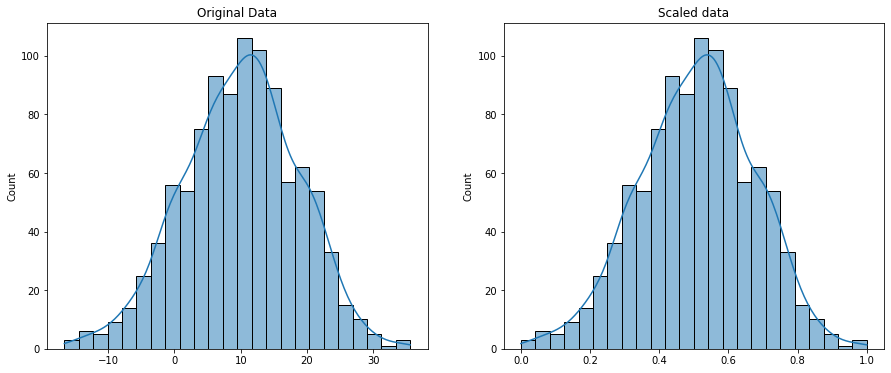

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

original_data = np.random.normal(10, 9, size=1000)

minimum = min(original_data)
maximum = max(original_data)

minmax = [(x - minimum)/ (maximum - minimum) for x in original_data]

print(f'original: {original_data[:5]}')
print(f'Minmax: {minmax[:5]}')

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(minmax, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

Ahora realicemos el mismo proceso utilizando la clase `MinMaxScaler` disponible en `sklearn`

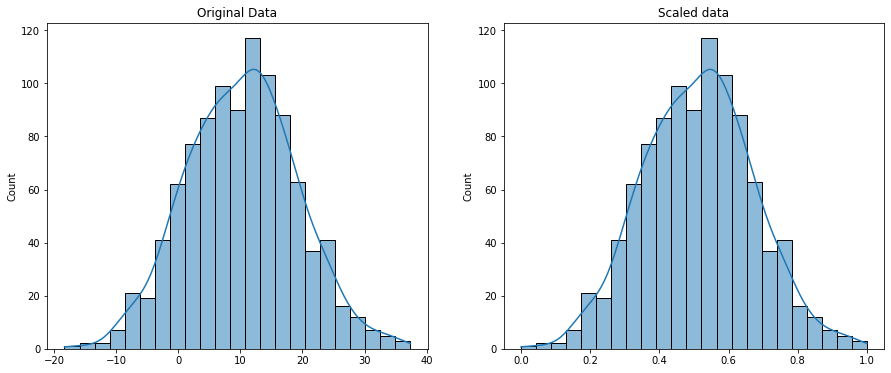

In [ ]:
from sklearn.preprocessing import MinMaxScaler

original_data = np.random.normal(10, 9, size=1000).reshape(-1,1)

min_max = MinMaxScaler()
scaled_data = min_max.fit_transform(original_data.reshape(-1,1))

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

### __Estandarización__

En este caso, cambiaremos la escala de nuestros datos para que la media sea $0$ y la desviación estándar sea $1$

$$ x_i = \frac{x_i-mean(X)}{std(X)} ,  ∀ x_i \in X $$

Implementandolo desde cero:

original: [-2.41013932  6.95037359 13.81483398 20.42143543 -2.12337595]
Minmax: [-1.4345312025051185, -0.3722375440701616, 0.40678736703481405, 1.1565487202983267, -1.4019873760148747]


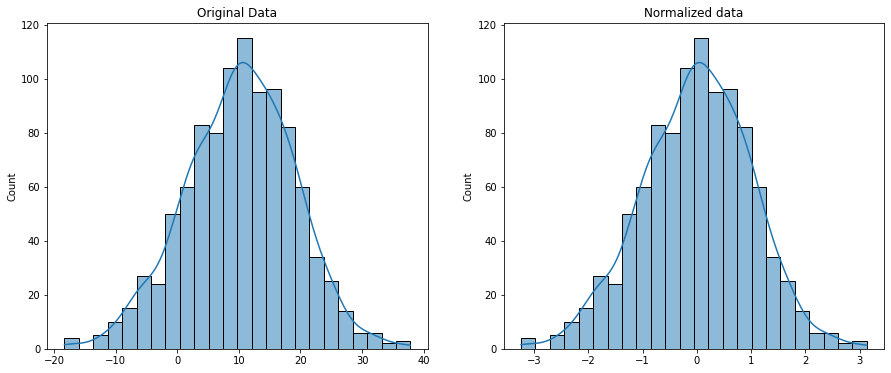

In [ ]:
original_data = np.random.normal(10, 9, size=1000)

mean = np.mean(original_data)
std = np.std(original_data)

z_score = [(x - mean) / (std)  for x in original_data]

print(f'original: {original_data[:5]}')
print(f'Minmax: {z_score[:5]}')

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(z_score, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

Ahora realicemos el mismo proceso utilizando la clase `StandardScaler` disponible en `sklearn`

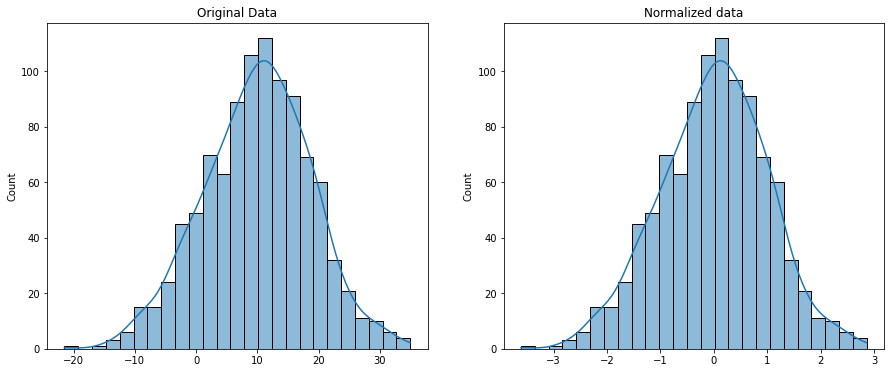

In [ ]:
from sklearn.preprocessing import StandardScaler

original_data = np.random.normal(10, 9, size=1000).reshape(-1,1)

std = StandardScaler()
normalized_data = std.fit_transform(original_data)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

# __Transformar datos categóricos__

Los algoritmos de aprendizaje de máquina requieren que todas las variables de entrada y salida sean numéricas. Esto significa que si mis datos cuentan con variables categóricas deben ser codificadas. Los datos categóricos pueden dividirse en tres categorías
&ensp;
<center>

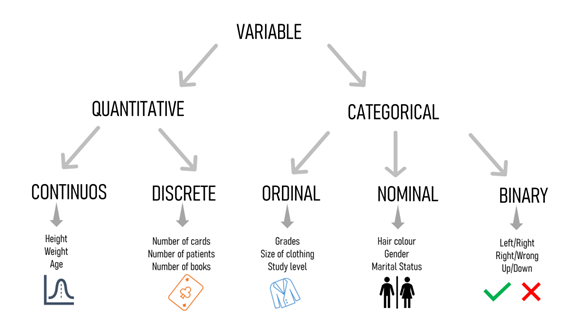

</center>

Existen tres enfoques diferentes para convertir datos categóricos a numéricos:

* Codificación ordinal:
* Codificación one-hot:
* Codificación con variables dummy:

A continuación se presenta un ejemplo de cada uno.

### __Codificación ordinal__
 
En la codificación ordinal a cada categoría se le asignará un número entero desde $0$ hasta $n-1$. Por ejemplo, rojo es 1, verde es 2 y azul es 3. `scikit-learn` permite realizar este tipo de codificación a través de la clase `OrdinalEncoder`. Por defecto, se asignarán enteros a las etiquetas en la medida que son observadas en los datos. Si se desea un order específico se puede utilizar el parámetro `categories` el cual recibirá una lista. En caso de no especificar las categorías, se utilizará el orden alfabético para deducirlas automáticamente.

In [ ]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

data = np.asarray([['high'], ['medium'], ['low'], ['low'], ['none'], ['none']])
print('Datos originales:\n', data)

Datos originales:
 [['high']
 ['medium']
 ['low']
 ['low']
 ['none']
 ['none']]


Utilizando `OrdinalEncoder`:

In [ ]:
ordinal_encoder = OrdinalEncoder()

result = ordinal_encoder.fit_transform(data)
print('Datos codificados:\n', result)

Datos codificados:
 [[0.]
 [2.]
 [1.]
 [1.]
 [3.]
 [3.]]


Utilizando el argumento `categories`:

In [ ]:
data = np.asarray([['high'], ['medium'], ['low'], ['low'], ['none'], ['none']])
cat=[['none', 'low', 'medium', 'high']]

ordinal_encoder = OrdinalEncoder(categories=cat)

result = ordinal_encoder.fit_transform(data)
print('Datos codificados:\n', result)

Datos codificados:
 [[3.]
 [2.]
 [1.]
 [1.]
 [0.]
 [0.]]


También podemos aplicar la transformación inversa mediante el método `inverse_transform()`

In [ ]:
original = ordinal_encoder.inverse_transform(result)
print('Datos decodificados:\n', original)

Datos decodificados:
 [['high']
 ['medium']
 ['low']
 ['low']
 ['none']
 ['none']]


Es importante recordar que la clase `OrdinalEncoder` está diseñada para tratar con variables de entrada. Si se requiere realizar una codificación para la variable objetivo en un problema de clasificación puede utilizarse la clase `LabelEncoder` 

### __Codificación One-Hot__

Para variables categóricas que no tienen una relación de orden (nominales), la codificación basada en números enteros puede no ser suficiente e inclusive generar problemas con el  modelo debido a que podría agregar una relación de orden durante la codificación que no existe en los datos originales. En este tipo de situaciones, se agregará una nueva variable por cada una de las categorías presentes.

<center>

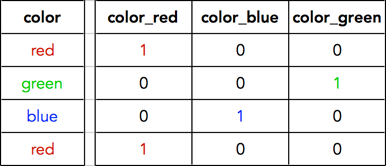
</center>

Veamos un ejemplo:

In [ ]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder

data = asarray([['red'], ['green'], ['blue'], ['red']])
print('Datos originales:\n', data)

Datos originales:
 [['red']
 ['green']
 ['blue']
 ['red']]


In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)

onehot = onehot_encoder.fit_transform(data)
print('Datos codificados:\n', onehot)

Datos codificados:
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


### __Codificación con variables dummy__

El codificador One-Hot crea una variable binaria para cada categoría. Sin embargo, un problema que presenta esta codificación es que tendremos un término redundante y que será linealmente dependiente con los demás. Esto puede generar problemas de multicolinealidad. Una solución el eliminar una de las columnas.

In [ ]:
# define data
data = asarray([['red'], ['green'], ['blue'], ['red']])
print('Datos originales:\n', data)

onehot_encoder = OneHotEncoder(drop='first', sparse=False)
onehot = onehot_encoder.fit_transform(data)
print('Datos codificados:\n', onehot)

Datos originales:
 [['red']
 ['green']
 ['blue']
 ['red']]
Datos codificados:
 [[0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 1.]]


# __Pipelines para preprocesamiento__

En la mayoría de los casos tendremos que trabajar con datos numéricos y valores categóricos de manera conjunta. `Sklearn` permite utilizar la clase `Pipeline` la cual permitirá aplicar un conjunto de transformaciones a los datos de forma secuencial. 

<center>

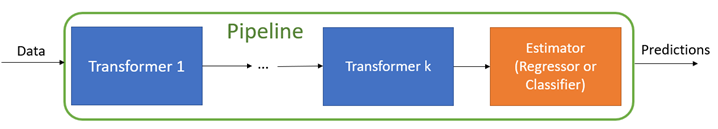

</center>

Se debe tener en cuenta lo siguiente. En un pipeline:

* Un `Transformer` tienen como propósito filtrar o modificar los datos. Son clases que implementan los métodos `fit()` y `transform()`

* Un `Estimator` tiene como propósito aprender de los datos. Son clases que implementan los métodos `fit()` y `predict()`

* Se espera que el último proceso en el pipeline sea un estimador.

## __Ejemplo preprocesamiento: RMS Titanic__

Uno de los mayores desastres de la historia moderna ocurrió en 1912 con el hundimiento del trasatlántico británico RMS Titanic. En este evento fallecieron aproximadamente 1500 personas.

<center>

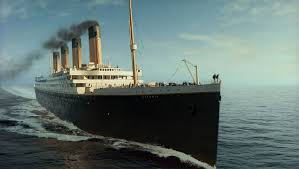

</center>

En este caso contamos con un conjunto de datos con información sobre el último viaje del trasatlántico. Intentaremos construir un modelo que ayude a predecir la probabilidad que uno de los pasajeros sobreviviera al naufragio a partir de la información disponible. Disponemos de los siguientes datos:

* `pclass:`: Tipo de tiquete (1ra-clase, 2da-clase, 3ra-clase)
* `survival` Sobrevió ($0$ = NO, $1$ = SI)
* `name:` Nombre del pasajero
* `sex:` Sexo
* `age:` Edad
* `sibsp:` Número de hermanos/cónyuges en el barco
* `parch:` Número de padres/hijos en el barco
* `ticket:` Número de tiquete
* `fare:` Costo del viaje para el pasajero (en libras)
* `cabin:` Número de cabina
* `embarked:` Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)
* `home.dest:` Destino final

Primero debemos cargar los datos disponibles en un `DataFrame`

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/EDA/titanic.csv'
data = pd.read_csv(url, sep=';')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,"Montreal, PQ / Chesterville, ON"


Podemos generar un resumen utilizad el método `info()`

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   object 
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   object 
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  home.dest  745 non-null    object 
dtypes: float64(4), object(8)
memory usage: 122.9+ KB


Podemos eliminar algunas columnas `[name, ticket, cabin, home.dest]` ya que no serán de utilidad en el análisis.

In [ ]:
data.drop(columns=['name', 'ticket', 'cabin', 'home.dest'], inplace=True)
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29,0.0,0.0,"211,3375",S
1,1.0,1.0,male,"0,9167",1.0,2.0,"151,5500",S
2,1.0,0.0,female,2,1.0,2.0,"151,5500",S
3,1.0,0.0,male,30,1.0,2.0,"151,5500",S
4,1.0,0.0,female,25,1.0,2.0,"151,5500",S


Al realizar nuevamente los datos es posible notar que las columnas `age` y `fare` tiene tipos de datos `object` (usualmente strings), pero deberían ser de tipo numérico.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1309 non-null   float64
 2   sex       1309 non-null   object 
 3   age       1046 non-null   object 
 4   sibsp     1309 non-null   float64
 5   parch     1309 non-null   float64
 6   fare      1308 non-null   object 
 7   embarked  1307 non-null   object 
dtypes: float64(4), object(4)
memory usage: 82.0+ KB


Es posible transformar estas columnas a tipo flotante utilizando el método `map()`

In [ ]:
data.age = data.age.map(lambda x : str(x).replace(',','.')).astype(float)
data.fare = data.age.map(lambda x : str(x).replace(',','.')).astype(float)

Podemos verificar si existen datos faltantes en la variable objetivo (`survived`). 

In [ ]:
data.survived.isnull().sum()

1

En este caso es necesario eliminar este registro ya que no será de utildad en el entrenamiento.

In [ ]:
data.drop(1309, inplace=True)

Al realizar una nueva verificación podemos comprobar que los datos parecen estar listos para realizar las transformaciones necesarias.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1309 non-null   float64
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   float64
 5   parch     1309 non-null   float64
 6   fare      1046 non-null   float64
 7   embarked  1307 non-null   object 
dtypes: float64(6), object(2)
memory usage: 92.0+ KB


Primero seleccionamos los nombres de las variables de tipo numérico. Para esto podemos utilizar el método `select_dtypes()`

In [ ]:
numerical_columns = data.drop(columns=['survived']).select_dtypes(include=np.number).columns
numerical_columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

Realizamos el mismo proceso para las variables categóricas

In [ ]:
categorical_columns = data.select_dtypes(exclude=np.number).columns
categorical_columns

Index(['sex', 'embarked'], dtype='object')

Ahora podemos crear dos pipelines. Uno encargado de la transformación de los datos numéricos y otro para los datos categóricos. Posteriormente, podemos combinarlos utilizando la clase `ColumnTransform` y agregar un estimador como último paso en el pipeline. El objetivo es lograr una secuencia como la que se presenta a continuación.

<center>

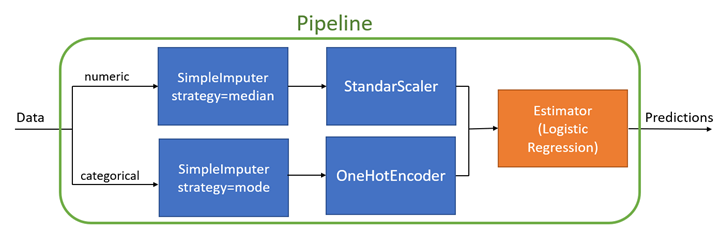

</center>

Primero, creamos el pipeline para los datos numéricos.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_transformer = Pipeline(
    steps=[("numerical_imputer", SimpleImputer(strategy="median")), 
           ("scaler", StandardScaler())])

Luego para los datos categóricos

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = Pipeline(
    steps=[("categorical_imputer", SimpleImputer(strategy="most_frequent")), 
           ("one-hot", OneHotEncoder(handle_unknown="ignore", sparse=False, drop='first'))])

Utilizaremos la clase `ColumnTransformer` para combinar los dos pipelines creados en los pasos anteriores.

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", numeric_transformer, numerical_columns),
        ("categorical", categorical_transformer, categorical_columns),
    ]
)

Podemos probar nuestro pipeline de preprocesamiento.

In [ ]:
processed_data = preprocessor.fit_transform(data)
pd.DataFrame(processed_data).head()

,0,1,2,3,4,5,6,7
0,-1.546098,-0.039005,-0.479087,-0.445000,-0.039005,0.0,0.0,1.0
1,-1.546098,-2.215952,0.481288,1.866526,-2.215952,1.0,0.0,1.0
2,-1.546098,-2.131977,0.481288,1.866526,-2.131977,0.0,0.0,1.0
3,-1.546098,0.038512,0.481288,1.866526,0.038512,1.0,0.0,1.0
4,-1.546098,-0.349075,0.481288,1.866526,-0.349075,0.0,0.0,1.0


Finalmente, podemos agregar un estimador a nuestro pipeline. Esto permitirá que a la hora de realizar la predicción, primero se realice todas las etapas de preprocesamiento. En este caso se utilizará una regresión logística, sin embargo, podría ser cualquier estimador.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

classifier = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("classifier", LogisticRegression())])

X = data.drop(columns=['survived'])
y = data.survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier.fit(X_train, y_train)

predicted = classifier.predict(X_test)

print('Training set score: ' + str(classifier.score(X_test, y_test)))

Training set score: 0.7938931297709924
